In [98]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
from itertools import*
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mousedf = pd.read_csv(mouse_drug_data_to_load)
clinicdf = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
df = mousedf.merge(clinicdf)
# Display the data table for preview
df


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
5,f234,Stelasyn,25,52.178602,2
6,f234,Stelasyn,30,56.873817,2
7,f234,Stelasyn,35,57.748758,2
8,x402,Stelasyn,0,45.000000,0
9,x402,Stelasyn,5,46.327570,1


## Tumor Response to Treatment

In [117]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
MeanDrugDF = df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
MeanDrugDF = pd.DataFrame(MeanDrugDF)
# Preview DataFrame
MeanDrugDF.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [71]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_error = df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()
#standard_error
# Convert to DataFrame
MeanDrugDF["Standard Error"] = standard_error
# Preview DataFrame
MeanDrugDF.head()


Tumor Volume (mm3)  Standard Error
Drug      Timepoint                                    
Capomulin 0                   45.000000        0.000000
          5                   44.266086        0.448593
          10                  43.084291        0.702684
          15                  42.064317        0.838617
          20                  40.716325        0.909731

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [72]:
# Minor Data Munging to Re-Form()
#MeanDrugDF.head()
munged = MeanDrugDF.swaplevel().unstack()
#(df.set_index('fruits').T)
# Preview that Reformatting worked
#MeanDrugDF.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [108]:
munged

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   
25                 39.939528  54.287674  55.715252  57.678982  56.731968   
30                 38.769339  56.769517  58.299397  60.994507  59.559509   
35                 37.816839  58.827548  60.742461  63.371686  62.685087   
40                 36.958001  61.467895  63.162824  66.068580  65.600754   
45                 36.236114  64.132421  65.755562  70.662958  69.265506   

                                                                  \
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol   
Timepoint                                                          
0          45.000000  45.000000  45.000000  45.000000  45.000000   
5          47.125589  47.248967  43.944859  47.527452  46.851818   
10         49.423329  49.101541  42.531957  49.463844  48.689881   
15         51.359742  51.067318  41.495061  51.529409  50.779059   
20         54.364417  53.346737  40.238325  54.067395  53.170334   
25         57.482574  55.504138  38.974300  56.166123  55.432935   
30         59.809063  58.196374  38.703137  59.826738  57.713531   
35         62.420615  60.350199  37.451996  62.440699  60.089372   
40         65.052675  63.045537  36.574081  65.356386  62.916692   
45         68.084082  66.258529  34.955595  68.438310  65.960888   

          Standard Error                                                    \
Drug           Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                    
0               0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5               0.448593  0.164505  0.235102  0.264819  0.202385  0.218091   
10              0.702684  0.236144  0.282346  0.357421  0.319415  0.402064   
15              0.838617  0.332053  0.357705  0.580268  0.444378  0.614461   
20              0.909731  0.359482  0.476210  0.726484  0.595260  0.839609   
25              0.881642  0.439356  0.550315  0.755413  0.813706  1.034872   
30              0.934460  0.490620  0.631061  0.934121  0.975496  1.218231   
35              1.052241  0.692248  0.984155  1.127867  1.013769  1.287481   
40              1.223608  0.708505  1.055220  1.158449  1.118567  1.370634   
45              1.223977  0.902358  1.144427  1.453186  1.416363  1.351726   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.231708  0.482955  0.239862  0.188950  
10         0.376195  0.720225  0.433678  0.263949  
15         0.466109  0.770432  0.493261  0.370544  
20         0.555181  0.786199  0.621889  0.533182  
25         0.577401  0.746991  0.741922  0.602513  
30         0.746045  0.864906  0.899548  0.800043  
35         1.084929  0.967433  1.003186  0.881426  
40         1.564779  1.128445  1.410435  0.998515  
45         1.888586  1.226805  1.576556  1.003576

In [112]:
munged.columns
    

MultiIndex(levels=[['Tumor Volume (mm3)', 'Standard Error'], ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]],
           names=[None, 'Drug'])

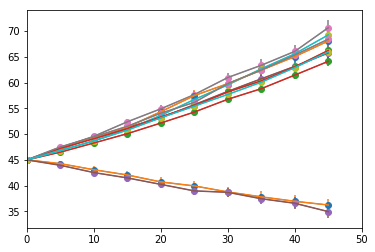

In [110]:
# Generate the Plot (with Error Bars)

timepoints = np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45])
plt.xlim(0, 50)

for drugs in munged["Tumor Volume (mm3)"].columns:
    plt.plot(timepoints, munged["Tumor Volume (mm3)"][drugs], linewidth=1, marker="o")
    plt.errorbar(timepoints, munged["Tumor Volume (mm3)"][drugs], munged["Standard Error"][drugs])
            
# Save the Figure
plt.savefig("../Images/TumorVolume.png")
plt.show()


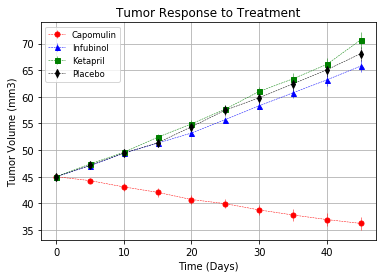

In [5]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [75]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
MetasticDrugDF = df.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean()
# Convert to DataFrame
MetasticDrugDF = pd.DataFrame(MetasticDrugDF)
# Preview DataFrame
MetasticDrugDF

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
          25                 0.818182
          30                 1.090909
          35                 1.181818
          40                 1.380952
          45                 1.476190
Ceftamin  0                  0.000000
          5                  0.380952
          10                 0.600000
          15                 0.789474
          20                 1.111111
          25                 1.500000
          30                 1.937500
          35                 2.071429
          40                 2.357143
          45                 2.692308
Infubinol 0                  0.000000
          5                  0.280000
          10                 0.666667
          15                 0.904762
          20                 1.050000
          25                 1.277778
          30                 1.588235
          35                 1.666667
          40                 2.100000
          45                 2.111111
...                               ...
Ramicane  0                  0.000000
          5                  0.120000
          10                 0.250000
          15                 0.333333
          20                 0.347826
          25                 0.652174
          30                 0.782609
          35                 0.952381
          40                 1.100000
          45                 1.250000
Stelasyn  0                  0.000000
          5                  0.240000
          10                 0.478261
          15                 0.782609
          20                 0.952381
          25                 1.157895
          30                 1.388889
          35                 1.562500
          40                 1.583333
          45                 1.727273
Zoniferol 0                  0.000000
          5                  0.166667
          10                 0.500000
          15                 0.809524
          20                 1.294118
          25                 1.687500
          30                 1.933333
          35                 2.285714
          40                 2.785714
          45                 3.071429

[100 rows x 1 columns]

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [76]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
standard_error_metastic = df.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem()
# Convert to DataFrame
MetasticDrugDF["Standard Error"] = standard_error_metastic
# Preview DataFrame
MetasticDrugDF

Metastatic Sites  Standard Error
Drug      Timepoint                                  
Capomulin 0                  0.000000        0.000000
          5                  0.160000        0.074833
          10                 0.320000        0.125433
          15                 0.375000        0.132048
          20                 0.652174        0.161621
          25                 0.818182        0.181818
          30                 1.090909        0.172944
          35                 1.181818        0.169496
          40                 1.380952        0.175610
          45                 1.476190        0.202591
Ceftamin  0                  0.000000        0.000000
          5                  0.380952        0.108588
          10                 0.600000        0.152177
          15                 0.789474        0.180625
          20                 1.111111        0.241034
          25                 1.500000        0.258831
          30                 1.937500        0.249479
          35                 2.071429        0.266526
          40                 2.357143        0.289128
          45                 2.692308        0.286101
Infubinol 0                  0.000000        0.000000
          5                  0.280000        0.091652
          10                 0.666667        0.159364
          15                 0.904762        0.194015
          20                 1.050000        0.234801
          25                 1.277778        0.265753
          30                 1.588235        0.227823
          35                 1.666667        0.224733
          40                 2.100000        0.314466
          45                 2.111111        0.309320
...                               ...             ...
Ramicane  0                  0.000000        0.000000
          5                  0.120000        0.066332
          10                 0.250000        0.090289
          15                 0.333333        0.115261
          20                 0.347826        0.119430
          25                 0.652174        0.119430
          30                 0.782609        0.139968
          35                 0.952381        0.145997
          40                 1.100000        0.160591
          45                 1.250000        0.190221
Stelasyn  0                  0.000000        0.000000
          5                  0.240000        0.087178
          10                 0.478261        0.123672
          15                 0.782609        0.153439
          20                 0.952381        0.200905
          25                 1.157895        0.219824
          30                 1.388889        0.230641
          35                 1.562500        0.240983
          40                 1.583333        0.312815
          45                 1.727273        0.359062
Zoniferol 0                  0.000000        0.000000
          5                  0.166667        0.077709
          10                 0.500000        0.109109
          15                 0.809524        0.111677
          20                 1.294118        0.166378
          25                 1.687500        0.236621
          30                 1.933333        0.248168
          35                 2.285714        0.285714
          40                 2.785714        0.299791
          45                 3.071429        0.286400

[100 rows x 2 columns]

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [77]:
# Minor Data Munging to Re-Format the Data Frames
munged_metastic = MetasticDrugDF.swaplevel().unstack()
# Preview that Reformatting worked
munged_metastic

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   
25                0.818182  1.500000  1.277778  1.631579  1.500000  1.941176   
30                1.090909  1.937500  1.588235  2.055556  2.066667  2.266667   
35                1.181818  2.071429  1.666667  2.294118  2.266667  2.642857   
40                1.380952  2.357143  2.100000  2.733333  2.466667  3.166667   
45                1.476190  2.692308  2.111111  3.363636  2.538462  3.272727   

                                                  Standard Error            \
Drug       Propriva  Ramicane  Stelasyn Zoniferol      Capomulin  Ceftamin   
Timepoint                                                                    
0          0.000000  0.000000  0.000000  0.000000       0.000000  0.000000   
5          0.320000  0.120000  0.240000  0.166667       0.074833  0.108588   
10         0.565217  0.250000  0.478261  0.500000       0.125433  0.152177   
15         0.764706  0.333333  0.782609  0.809524       0.132048  0.180625   
20         1.000000  0.347826  0.952381  1.294118       0.161621  0.241034   
25         1.357143  0.652174  1.157895  1.687500       0.181818  0.258831   
30         1.615385  0.782609  1.388889  1.933333       0.172944  0.249479   
35         2.300000  0.952381  1.562500  2.285714       0.169496  0.266526   
40         2.777778  1.100000  1.583333  2.785714       0.175610  0.289128   
45         2.571429  1.250000  1.727273  3.071429       0.202591  0.286101   

                                                                       \
Drug      Infubinol  Ketapril  Naftisol   Placebo  Propriva  Ramicane   
Timepoint                                                               
0          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5          0.091652  0.098100  0.093618  0.100947  0.095219  0.066332   
10         0.159364  0.142018  0.163577  0.115261  0.105690  0.090289   
15         0.194015  0.191381  0.158651  0.190221  0.136377  0.115261   
20         0.234801  0.236680  0.181731  0.234064  0.171499  0.119430   
25         0.265753  0.288275  0.185240  0.263888  0.199095  0.119430   
30         0.227823  0.347467  0.266667  0.300264  0.266469  0.139968   
35         0.224733  0.361418  0.330464  0.341412  0.366667  0.145997   
40         0.314466  0.315725  0.321702  0.297294  0.433903  0.160591   
45         0.309320  0.278722  0.351104  0.304240  0.428571  0.190221   

                               
Drug       Stelasyn Zoniferol  
Timepoint                      
0          0.000000  0.000000  
5          0.087178  0.077709  
10         0.123672  0.109109  
15         0.153439  0.111677  
20         0.200905  0.166378  
25         0.219824  0.236621  
30         0.230641  0.248168  
35         0.240983  0.285714  
40         0.312815  0.299791  
45         0.359062  0.286400

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [111]:
munged_metastic.columns

MultiIndex(levels=[['Metastatic Sites', 'Standard Error'], ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]],
           names=[None, 'Drug'])

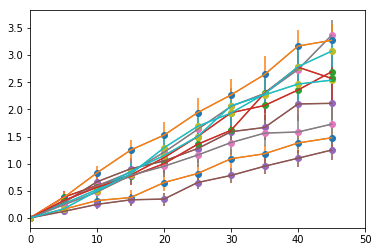

In [116]:
# Generate the Plot (with Error Bars)

timepoints = np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45])
plt.xlim(0, 50)
for drugs in munged["Tumor Volume (mm3)"].columns:
    plt.plot(timepoints, munged_metastic["Metastatic Sites"][drugs], linewidth=1, marker="o")
    plt.errorbar(timepoints, munged_metastic["Metastatic Sites"][drugs], munged_metastic["Standard Error"][drugs])
            
# Save the Figure
plt.savefig("../Images/MetasticSites.png")
plt.show()

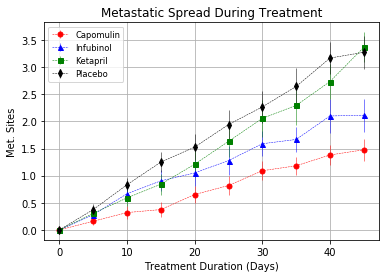

## Survival Rates

In [120]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
SurvivalDrugDF = df.groupby(["Drug","Timepoint"])["Mouse ID"].nunique()
# Convert to DataFrame
SurvivalDrugDF = pd.DataFrame(SurvivalDrugDF)
# Preview DataFrame
SurvivalDrugDF.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [121]:
# Minor Data Munging to Re-Format the Data Frames
munged_survival = SurvivalDrugDF.swaplevel().unstack()
# Preview that Reformatting worked
munged_survival

Mouse ID                                                        \
Drug      Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                   
0                25       25        25       25       25      25       25   
5                25       21        25       23       23      24       24   
10               25       20        21       22       21      24       22   
15               24       19        21       19       21      20       16   
20               23       18        20       19       20      19       16   
25               22       18        18       19       18      17       14   
30               22       16        17       18       15      15       13   
35               22       14        12       17       15      14       10   
40               21       14        10       15       15      12        9   
45               21       13         9       11       13      11        7   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       25        25  
5               25       24        24  
10              24       22        22  
15              24       22        21  
20              23       20        17  
25              23       19        16  
30              23       18        15  
35              21       16        14  
40              20       12        14  
45              20       11        14

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


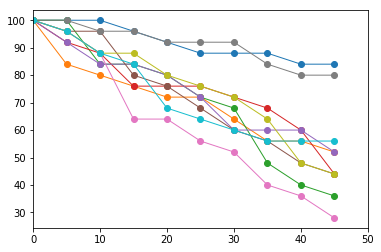

In [129]:
# Generate the Plot (Accounting for percentages)
timepoints = np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45])
plt.xlim(0, 50)
for drugs in munged_survival["Mouse ID"].columns:
    plt.plot(timepoints, (munged_survival["Mouse ID"][drugs]/25)*100, linewidth=1, marker="o")
            

# Save the Figure
#plt.savefig("../Images/Survival.png")
plt.show()

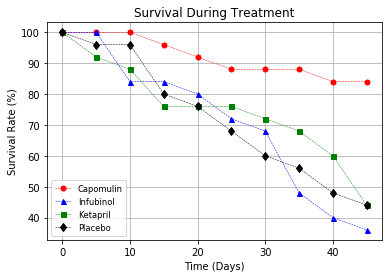

## Summary Bar Graph

In [143]:
# Calculate the percent changes for each drug




 #what do you want me to calculate the percent change of?
    #The metastic sites?
    #the tumor size?
    #the survivability?
    #all of it combines?

    

    
    
    
    


# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

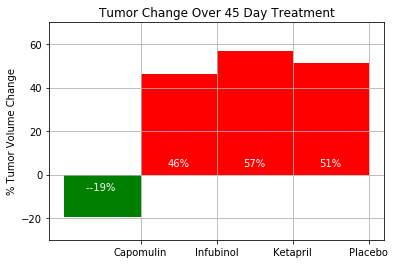